In [1]:
import os, os.path, re
from astropy.wcs import WCS
from astropy.io import fits
import astropy.units as u
import numpy as np
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)
from astropy.visualization.wcsaxes import add_beam
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

In [5]:
def plot_fits(filename, ra0, dec0, savefig=None, radius=0.2,  vmin=-10, vmax=60, dra=None, ddec=None, regions=[], 
              scale=1e+6, unit="$\mu$Jy", figsize=(8,8)):
    hdu = fits.open(filename)[0]
    hdr = hdu.header
    wcs = WCS(hdr).dropaxis(2).dropaxis(2)


    fig = plt.figure(figsize=figsize, layout='compressed', dpi=300)
    ax = plt.subplot(projection=wcs)
    img = ax.imshow(hdu.data[0,0]*scale, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
    ax.coords[0].set_axislabel('Right ascension') # , minpad=-2)
    ax.coords[1].set_axislabel('Declination', minpad=-1)

    # get position of center
    x0, y0 = wcs.world_to_pixel_values(ra0, dec0)
    r = int(radius / abs(hdr['CDELT1']))
    # zoom in
    if dra is None:
        ax.set_xlim(x0-r, x0+r)
    else:
        ax.set_xlim(x0 + int(dra[0] / abs(hdr['CDELT1'])), x0 + int(dra[1] / abs(hdr['CDELT1'])))
    if ddec is None:
        ax.set_ylim(y0-r, y0+r)
    else:
        ax.set_ylim(y0 + int(ddec[0] / abs(hdr['CDELT1'])), y0 + int(ddec[1] / abs(hdr['CDELT1'])))

    # add_beam(ax, hdr, facecolor='cyan', edgecolor='none')
    # add colourbar
    cbar1 = fig.colorbar(img, orientation='horizontal', shrink=0.6, location="top")
    cbar1.set_label(f'{unit}/beam')

    # add circle
    # add circle
    for radec, color, r_arcsec in regions:
        xy = wcs.world_to_pixel_values(*radec)
        reg = Circle(xy, r_arcsec/3600 / abs(hdr['CDELT1']), 
                    transform=ax.get_transform('pixel'), facecolor='none', 
                    edgecolor=color, lw=0.5, zorder=1000)
        ax.add_patch(reg)

    if savefig:
        fig.savefig(savefig, bbox_inches='tight', pad_inches=0)

In [ ]:
# burst = (212.78892180375175, -61.93031816598998)
# regions = [(burst, "yellow", 30)]
# norm = ImageNormalize(vmin=-0.1, vmax=3, stretch=SqrtStretch())
# plot_fits("AJ/T16R02C04-MFS-image.fits", *burst, norm, savefig="mgpls1-big.png", 
#           dra=(-0.5, 1), ddec=(-0.5, 1), figsize=(6,6),
#           regions=regions, scale=1e+3, unit='mJy')

In [ ]:
# plot_fits("AJ/T16R02C06-MFS-image.fits", *burst, norm, savefig="mgpls1-big.png", radius=1, regions=regions, scale=1e+3, unit='mJy')

/tmp/ipykernel_198194/1991852469.py:42: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.savefig(savefig, bbox_inches='tight', pad_inches=0)
/tmp/ipykernel_198194/1991852469.py:42: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.savefig(savefig, bbox_inches='tight', pad_inches=0)


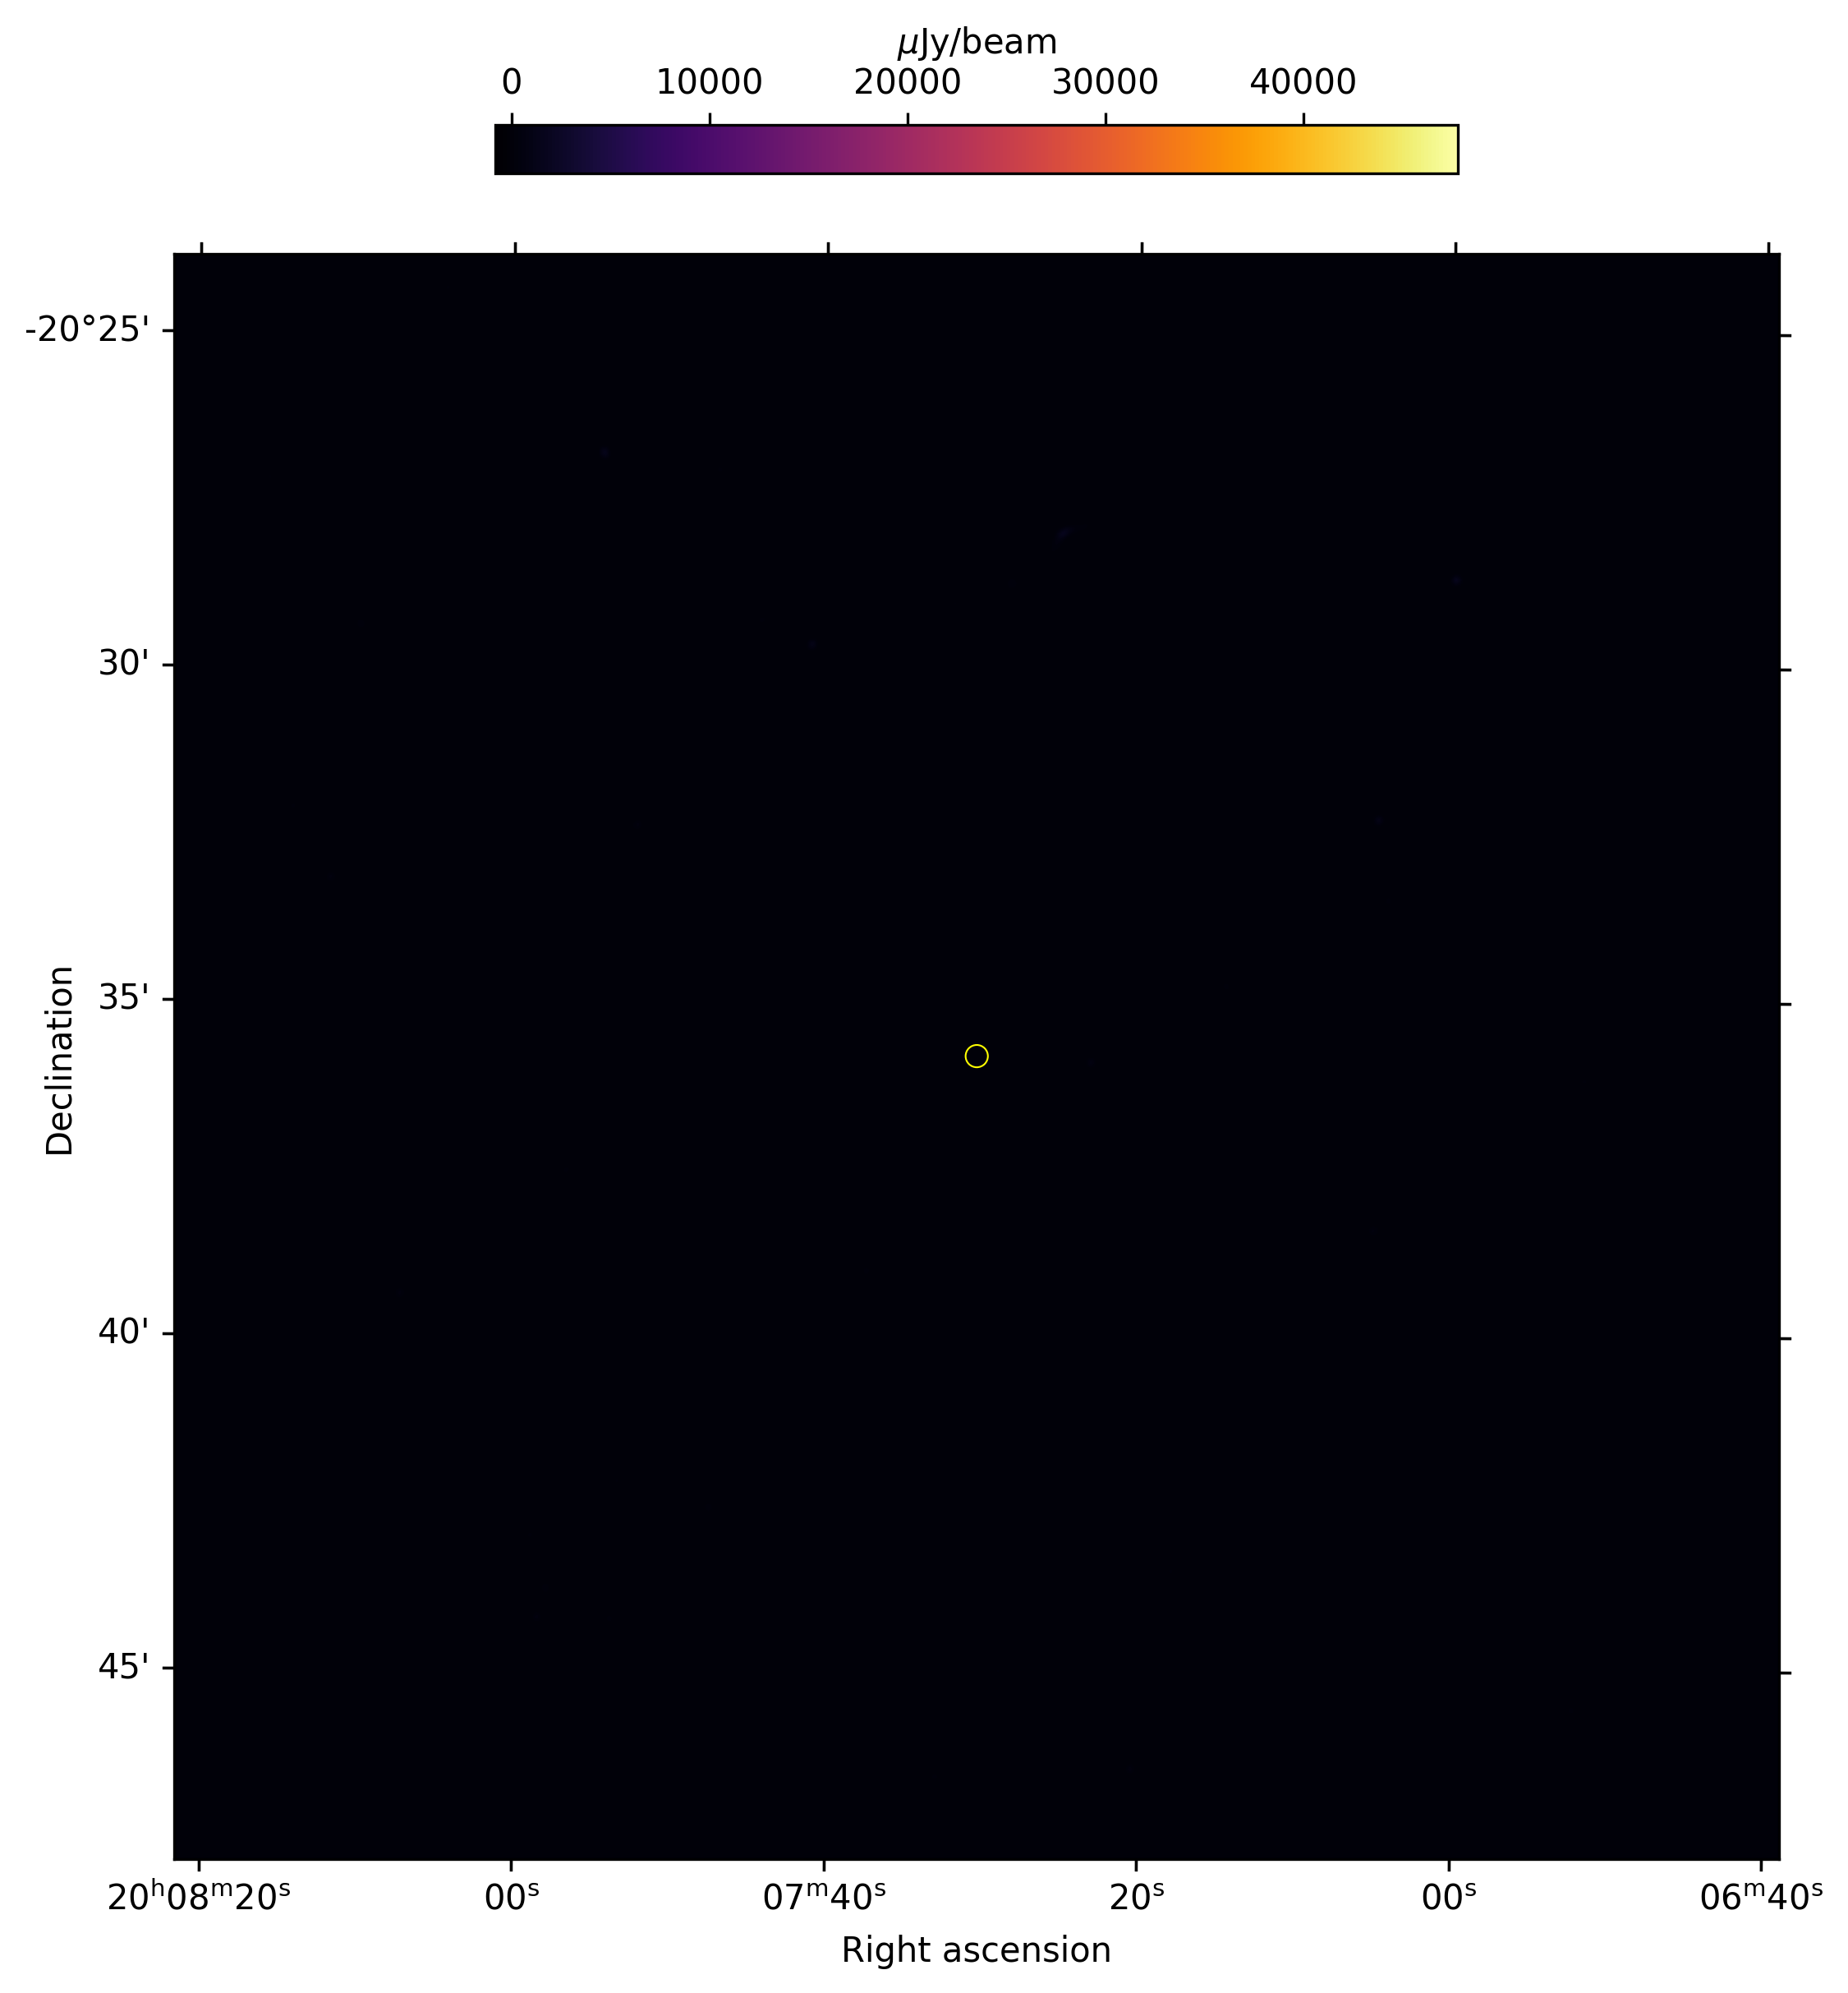

In [6]:
l2_burst = 301.8765046320836, -20.597057526089337
filename = "obs-l2-qc2/im3/im3-MFS-I-image.fits"
regions = [(l2_burst, "yellow", 10)]
plot_fits(filename, *l2_burst, savefig="l2-big.png", radius=0.2, vmin=-10, vmax=60, regions=regions)